(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

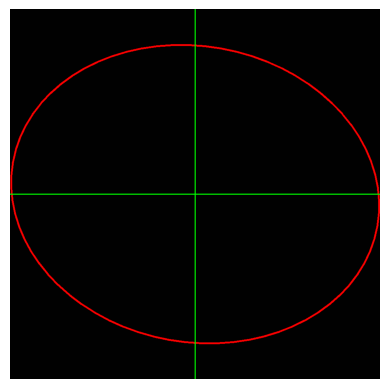

In [89]:
# draw elipse with matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np

# (cx, cy), (w, h), ang = ellipse
image = np.ones((1000, 1000, 3), dtype=np.uint8)

cv2.ellipse(image, (500,500), (500,400), 10, 0, 360, (255, 0, 0), 4)
# draw axes
cv2.line(image, (500, 0), (500, 1000), (0, 255, 0), 2)  # vertical line
cv2.line(image, (0, 500), (1000, 500), (0, 255, 0), 2)  # horizontal line
# make 100x 100 blank image
plt.imshow(image)
plt.axis('off')  # Hide the axes



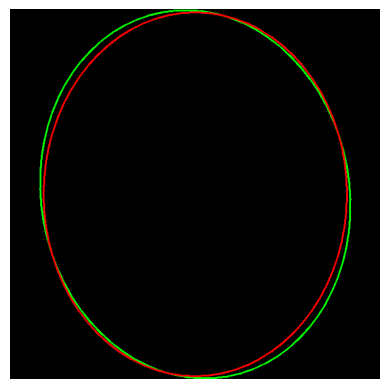

Original ellipse: ((300, 300), (500, 600), 170)
Normalized ellipse: ((300, 300), (np.float64(492.403876506104), np.float64(590.8846518073248)), 0.0)


: 

In [ ]:
import numpy as np
import math

def normalize_ellipse(ellipse, axis_color=(0, 0, 255), thickness=2):
    (cx, cy), (w, h), ang = ellipse
    θ = np.deg2rad(ang)

    # 1) build the two semi-axis vectors
    major_v = np.array([ np.cos(θ),  np.sin(θ) ]) * (w/2)
    minor_v = np.array([-np.sin(θ),  np.cos(θ) ]) * (h/2)

    # 2) project each onto horizontal or vertical (zero out the smaller component)
    def proj(v):
        return np.array([v[0], 0.]) if abs(v[0]) >= abs(v[1]) else np.array([0., v[1]])

    maj_p = proj(major_v)
    min_p = proj(minor_v)

    center = np.array([cx, cy])

    p1 = tuple((center + maj_p).astype(int))
    p2 = tuple((center - maj_p).astype(int))
    # cv2.line(image, p1, p2, axis_color, thickness)

    q1 = tuple((center + min_p).astype(int))
    q2 = tuple((center - min_p).astype(int))
    # cv2.line(image, q1, q2, axis_color, thickness)

    if maj_p[0] != 0:
        new_w = abs(maj_p[0]) * 2
        new_h = abs(min_p[1]) * 2
    else:
        new_w = abs(min_p[0]) * 2
        new_h = abs(maj_p[1]) * 2
    # resize so ellipse has same area as original
    area = np.pi * (w/2) * (h/2)
    new_area = np.pi * (new_w/2) * (new_h/2)
    scale_factor = np.sqrt(area / new_area)
    new_w *= scale_factor
    new_h *= scale_factor
    

    return ((cx, cy), (new_w, new_h), 0.0)

# Draw the normalized ellipse
image = np.zeros((600, 600, 3), dtype=np.uint8)

orig = ((300, 300), (500, 600), 170)    # center, width, height, 30°
norm = normalize_ellipse(orig)

# draw both ellipses for comparison
cv2.ellipse(image, orig[0], (int(orig[1][0]//2), int(orig[1][1]//2)), orig[2],
            0, 360, (0,255,0), 2)
cv2.ellipse(image, norm[0], (int(norm[1][0]//2), int(norm[1][1]//2)), norm[2],
            0, 360, (0,0,255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print (f"Original ellipse: {orig}")
print (f"Normalized ellipse: {norm}")
